In [23]:
import torch
import math
import numpy as np
from matplotlib import pyplot as plt
from plotutil import PlotLayout

In [40]:
# A = torch.tensor([
#     [0., 2.],
#     [2., 0.]
# ])
# A = torch.tensor([
#     [1., 1/3],
#     [4/3, 1.]
# ])
A = torch.tensor([
    [1., 1/3],
    [1/3, 2.]
])

eig = torch.eig(A, eigenvectors=True).eigenvectors
u = A.svd().U
s = A.svd().S
v = A.svd().V

In [41]:
def get_arrow(W, x1):
    x2 = W @ x1
    dx = (x2 - x1).tolist()
    x1 = x1.tolist()
    return x1[0], x1[1], dx[0], dx[1]

def adjust_plot(lim):
    plt.axis('square')
    lim *= 1.2
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.scatter([0], [0])

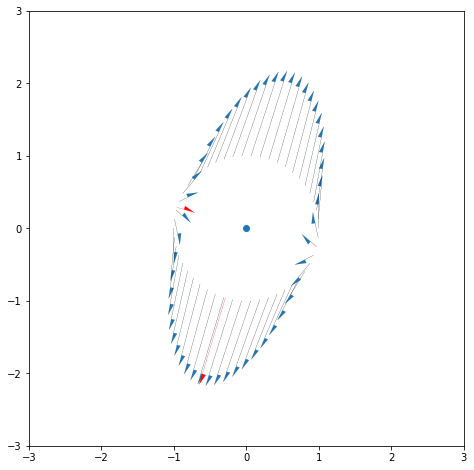

In [42]:
plt.figure(figsize=(8, 8))
for theta in np.arange(0, 6.28, 6.28 / 50):
    x = torch.tensor([math.cos(theta), math.sin(theta)])
    plt.arrow(*get_arrow(A, x), 
              head_width=0.1, shape='right', linestyle='-', linewidth=0.1)

plt.arrow(*get_arrow(A, eig[:, 0]),
          head_width=0.1, shape='right', linestyle='-', linewidth=0.1, color='r')
plt.arrow(*get_arrow(A, eig[:, 1]),
          head_width=0.1, shape='right', linestyle='-', linewidth=0.1, color='r')

adjust_plot(2.5)

allocating 1 rows x 3 cols for 3 subplots.


<Figure size 432x432 with 0 Axes>

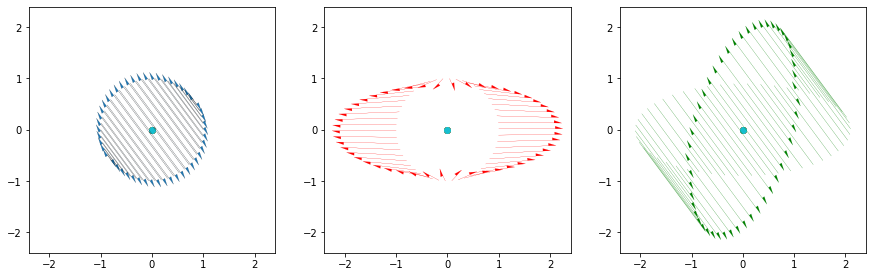

In [43]:
plt.figure(figsize=(6, 6))
layout = PlotLayout(plt, 3, 1)
layout.prepare()
layout.subplot(0)
lim = 2
for theta in np.arange(0, 6.28, 6.28 / 50):
    x = torch.tensor([math.cos(theta), math.sin(theta)])
    plt.arrow(*get_arrow(v, x), 
              head_width=0.1, shape='right', linestyle='-', linewidth=0.1)
    adjust_plot(lim)
    
layout.subplot(1)
for theta in np.arange(0, 6.28, 6.28 / 50):
    x = torch.tensor([math.cos(theta), math.sin(theta)])
    plt.arrow(*get_arrow(torch.diag(s), v @ x), 
              head_width=0.1, shape='right', linestyle='-', linewidth=0.1, color='r')
    adjust_plot(lim)
    
layout.subplot(2)
for theta in np.arange(0, 6.28, 6.28 / 50):
    x = torch.tensor([math.cos(theta), math.sin(theta)])
    plt.arrow(*get_arrow(u, torch.diag(s) @ v @ x), 
              head_width=0.1, shape='right', linestyle='-', linewidth=0.1, color='g')
    adjust_plot(lim)
